In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
crime = pd.read_csv("C:/Users/manth/Assignment/Clustering/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# Normalization function 
def norm_func(i):
   x = (i-i.min())/(i.max()-i.min())
   return (x)


df_norm = norm_func(crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


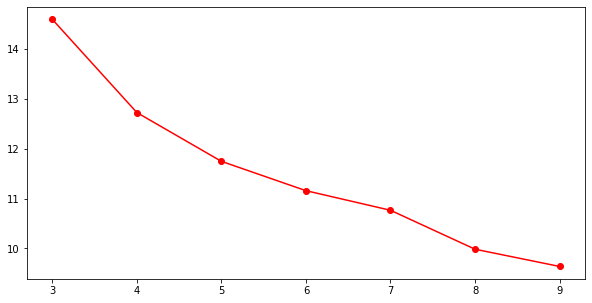

In [4]:
#Generate Elbow Curve

k = list(range(3,10))

Total_WSS=[]

for i in k:
    kmean=KMeans(n_clusters=i).fit(df_norm)
    WSS=[]
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmean.labels_==j,:],kmean.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean" )))
    Total_WSS.append(sum(WSS))

# Scree plot 
plt.figure(figsize=(10,5))
plt.plot(k,Total_WSS,'ro-') 
plt.xticks(k)
plt.show()

In [5]:
# Applying K-means clustering

# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)
model.labels_ # getting the labels of clusters assigned to each row 

array([3, 0, 0, 2, 0, 0, 4, 2, 0, 3, 4, 1, 0, 2, 1, 2, 2, 3, 1, 0, 4, 0,
       1, 3, 2, 1, 1, 0, 1, 4, 0, 0, 3, 1, 4, 2, 2, 4, 4, 3, 1, 3, 0, 4,
       1, 2, 4, 1, 1, 2])

In [6]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
crime['cluster']=md # creating a  new column and assigning it to new column 
md.head()

0    3
1    0
2    0
3    2
4    0
dtype: int32

In [7]:
crime = crime.iloc[:,[5,0,1,2,3,4]]

crime.iloc[:,1:7].groupby(crime.cluster).mean()
crime.sort_values(by=['cluster'], inplace=True)
crime.head()

,cluster,Unnamed: 0,Murder,Assault,UrbanPop,Rape
27,0,Nevada,12.2,252,81,46.0
1,0,Alaska,10.0,263,48,44.5
2,0,Arizona,8.1,294,80,31.0
21,0,Michigan,12.1,255,74,35.1
4,0,California,9.0,276,91,40.6


In [8]:
crime.to_csv("crime_k.csv")